# BANK CHURN PREDICTION MODEL

In [1]:
import pandas as pd                                                      # importing pandas and numpy librarires
import numpy as np

In [2]:
df = pd.read_csv('Churn_Modelling.csv')                                  # reading the csv file
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape                                                                 # printing the shape of the dataframe

(10000, 14)

## NULL VALUE DETECTION

In [4]:
df.isna().sum()                                                         # printing all the null values in the columns

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.info()                                                              # checking the data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### NO null values were found in any columns so next we will try to find outliers.

## DATA VISUALIZATION

In [6]:
import matplotlib.pyplot as plt                                                   # importing visualization libraries like matplotlib and seaborn
import seaborn as sn
%matplotlib inline

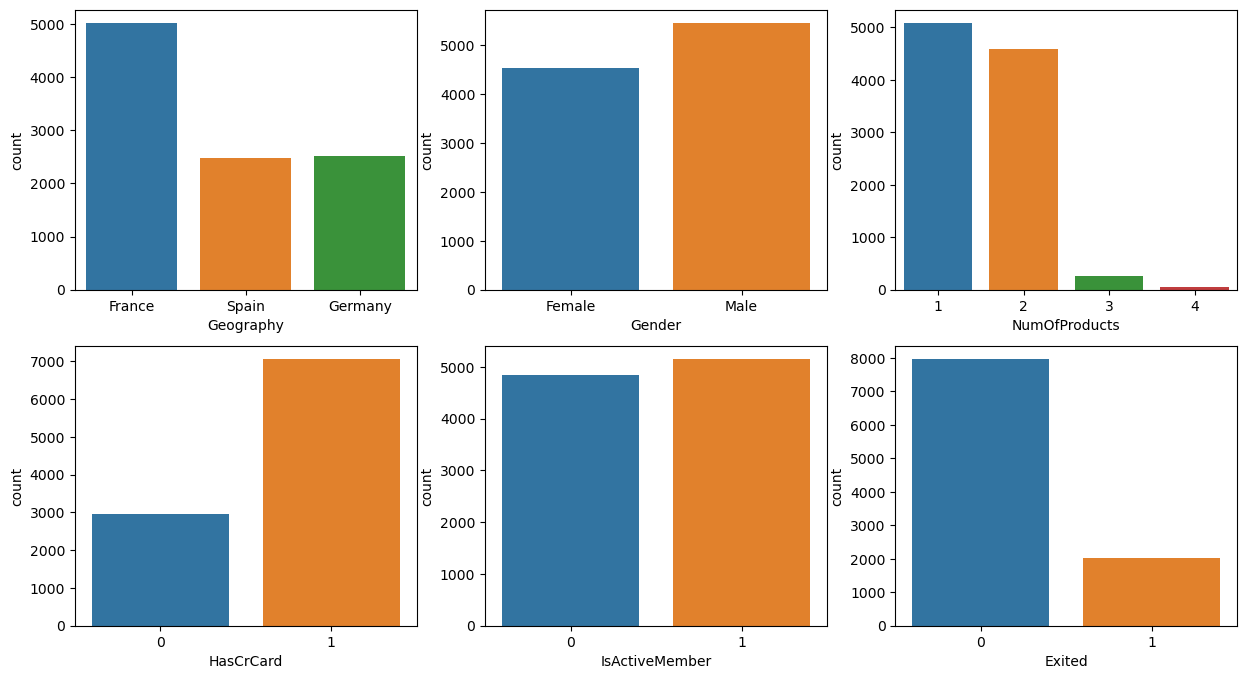

In [7]:
col = ['Geography',	'Gender','NumOfProducts',	'HasCrCard', 'IsActiveMember',	'Exited']                                                     # columns for countplot
plt.figure(figsize=(15,8))                                                        # setting the figure size to (15,4)
for i in range(len(col)):                                                         
    plt.subplot(2,3,i+1)                                                          # subplot to print charts side by side
    sn.countplot(data = df,x = col[i])                                            # finally printing the countplot
plt.show()    

### With these above countplots we can see that which all values are there in the respective columns what is the count of each value in the column. This helps in determing whether to keep the column or not.
### And from the last countplot of Exited column wecan see that our dataset is imbalanced because the count of 0 is certainly larger than the count of 1. we will try to balance the model using Smote in the later part of the project.

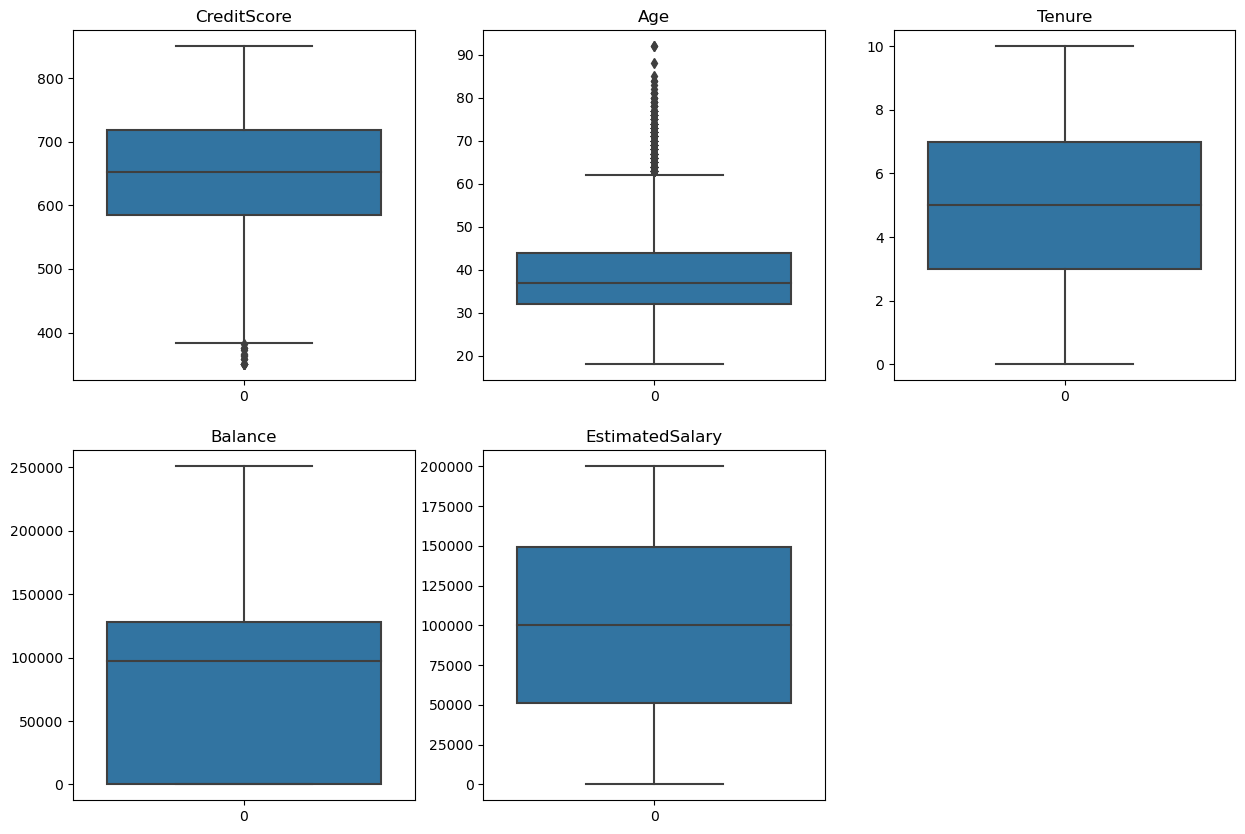

In [8]:
col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']                        # columns for boxplot
plt.figure(figsize=(15,10))                                                                 # setting the figure size
for i in range(len(col)):     
    plt.subplot(2,3,i+1)                                                                    # printing the plots side by side
    plt.title(col[i])                                                                       # printing the title for each column
    sn.boxplot(df[col[i]])                                                                  # printing the box plot

### With these boxplot we can see that there is outliers in two columns that is CreditScore and Age. Now we will try to scale the outliers as much as possible without negativly effecting the model.

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Scaling the outliers in the Age column

In [10]:
uv = np.percentile(df['Age'], [99])[0]                                                     # loading the 99 percentile value for scaling
df[(df['Age'] > 1.15*uv )]                                                                  # checking how many values are above the threshold

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2458,2459,15813303,Rearick,513,Spain,Male,88,10,0.00,2,1,1,52952.24,0
3033,3034,15578006,Yao,787,France,Female,85,10,0.00,2,1,1,116537.96,0
3387,3388,15798024,Lori,537,Germany,Male,84,8,92242.34,1,1,1,186235.98,0
3531,3532,15653251,Hickey,408,France,Female,84,8,87873.39,1,0,0,188484.52,1
6443,6444,15764927,Rogova,753,France,Male,92,3,121513.31,1,0,1,195563.99,0
6759,6760,15660878,T'ien,705,France,Male,92,1,126076.24,2,1,1,34436.83,0
9309,9310,15621644,Lombardi,678,Germany,Male,83,6,123356.63,1,0,1,92934.41,0


In [11]:
df['Age'][(df['Age'] > 1.15*uv )] = 1.15*uv                                                # scaling all the values above the threshold

C:\Users\dell\AppData\Local\Temp\ipykernel_13432\268950540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][(df['Age'] > 1.15*uv )] = 1.15*uv                                                # scaling all the values above the threshold


## Scaling the outliers in CreditScore

In [12]:
lv = np.percentile(df['CreditScore'], [1])[0]                                                     # loading the 99 percentile value for scaling
df[(df['CreditScore'] < 0.85*lv )]                                                                  # checking how many values are above the threshold

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1193,1194,15779947,Thomas,363,Spain,Female,28.0,6,146098.43,3,1,0,100615.14,1
1405,1406,15612494,Panicucci,359,France,Female,44.0,6,128747.69,1,1,0,146955.71,1
1631,1632,15685372,Azubuike,350,Spain,Male,54.0,1,152677.48,1,1,1,191973.49,1
1838,1839,15758813,Campbell,350,Germany,Male,39.0,0,109733.20,2,0,0,123602.11,1
1962,1963,15692416,Aikenhead,358,Spain,Female,52.0,8,143542.36,3,1,0,141959.11,1
2473,2474,15679249,Chou,351,Germany,Female,57.0,4,163146.46,1,1,0,169621.69,1
2579,2580,15597896,Ozoemena,365,Germany,Male,30.0,0,127760.07,1,1,0,81537.85,1
8154,8155,15791533,Ch'ien,367,Spain,Male,42.0,6,93608.28,1,1,0,168816.73,1
8723,8724,15803202,Onyekachi,350,France,Male,51.0,10,0.00,1,1,1,125823.79,1
8762,8763,15765173,Lin,350,France,Female,60.0,3,0.00,1,0,0,113796.15,1


In [13]:
df['CreditScore'][(df['CreditScore'] < 0.85*lv )] = 0.85*lv                                                # scaling all the values above the threshold

C:\Users\dell\AppData\Local\Temp\ipykernel_13432\663430222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CreditScore'][(df['CreditScore'] < 0.85*lv )] = 0.85*lv                                                # scaling all the values above the threshold


## VISUALIZATION AFTER SCALING OUTLIERS

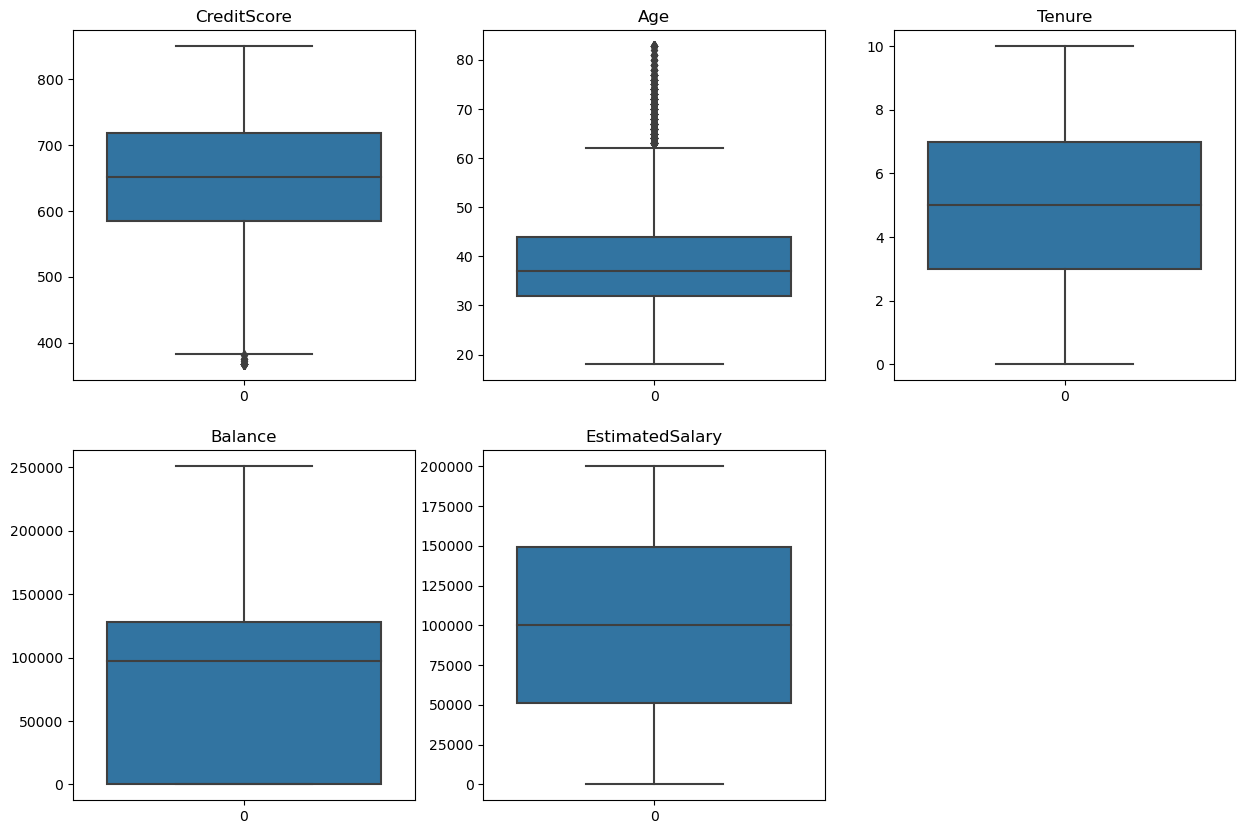

In [14]:
col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']                        # columns for boxplot
plt.figure(figsize=(15,10))                                                                 # setting the figure size
for i in range(len(col)):     
    plt.subplot(2,3,i+1)                                                                    # printing the plots side by side
    plt.title(col[i])                                                                       # printing the title for each column
    sn.boxplot(df[col[i]])                                                                  # printing the box plot

### Here we see the boxplot after scaling the outliers as we can see there are still outliers in the data but they are somewhat useful for the model.

### As we have scaled the outliers now our next step is One Hot encoding that is converting all the categorical columns into numerical columns.

## ONE HOT ENCODING

In [15]:
df1 = pd.get_dummies(df, columns=['Geography',	'Gender'],drop_first=True)                 # converting geography and gender into numerical columns
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619.0,42.0,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608.0,41.0,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502.0,42.0,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699.0,39.0,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850.0,43.0,2,125510.82,1,1,1,79084.10,0,0,1,0


### As all the required preprocessing is done now we will drop all the unwanted columns and also split the dataset into X and y.

## SPLITTING THE DATASET

In [16]:
X = df1.drop(columns=['RowNumber', 'CustomerId', 'Surname','Exited'], axis=1)            # columns that are independent and required
y = df1['Exited']                                                                        # column which is dependent 

In [17]:
from sklearn.model_selection import train_test_split                                     # importing the train_test_split library
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42,stratify=y)    # splitiing the data into train and test
X_train.shape,X_test.shape,y_train.shape,y_test.shape                                    # printing the shape

((8000, 11), (2000, 11), (8000,), (2000,))

## BALANCING THE DATASET USING SMOTE

In [18]:
from imblearn.over_sampling import SMOTE                                                 # importing smote 

In [19]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)                          # creating balanced data using smote

## IMPORTING LIBRARIES

In [20]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV                      # importing grid search and Randomized search

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix                              # importing accuracy and confusion matrix

In [22]:
from scipy.stats import randint, uniform                                                 # importing randint and uniform

In [108]:
from sklearn.metrics import roc_curve, auc                                               # importing roc_curve and auc 

In [109]:
def model_evaluation(model):                                                             # function for visualizing heatmaps and roc_curve
    cm_train = confusion_matrix(y_resampled, model.predict(X_resampled))                 # finding confusion matrix
    cm_test = confusion_matrix(y_test, model.predict(X_test))
    col = {'train':cm_train,
           'test':cm_test}                                                                     
    plt.figure(figsize=(15,4))                                                                 
    c = 1
    for i,j in col.items():
        plt.subplot(1,3,c)                                                                   
        c = c+1
        sn.heatmap(j, annot=True, fmt='d', cmap='Blues', cbar=False)                     # plotting heatmaps
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(i)                                                                   


    fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))                      # finding roc_curve
    roc_auc = auc(fpr, tpr)                                                              # finding the auc
    plt.subplot(1,3,3)   
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))      # plotting the roc curve
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

### The above is model_evaluation function which helps us visualize three charts in a single row. The first chart is the confusion matrix for  the train data and the second chart is the confusion matrix for test data and the third chart is for roc_curve which also shows the auc(area under the curve) of the curve.

## LOGISTIC REGRESSION

In [23]:
from sklearn.linear_model import LogisticRegression                                      # importing Logistic Regression

In [24]:
lr_params = {                                                                            # param_grid for logistic regression
    'C': uniform(0.1, 10),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000],
}
gv_lr = RandomizedSearchCV(LogisticRegression(),cv=5,param_distributions = lr_params,n_jobs= -1,error_score='raise',scoring='f1')  # performing grid Search cv to find best parameters
gv_lr.fit(X_resampled,y_resampled)
gv_lr.best_params_, gv_lr.best_score_   

C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


({'C': 2.704542487728585, 'max_iter': 100, 'solver': 'newton-cg'},
 0.7692038816170961)

In [25]:
lrr = gv_lr.best_estimator_                                                               # loading the best model with best parameters
lrr.fit(X_resampled,y_resampled)
print(f'train: accuracy_score = {accuracy_score(y_resampled,lrr.predict(X_resampled))}')  # printing training score
print(f'test: accuracy_score = {accuracy_score(y_test,lrr.predict(X_test))}')             # printing test score

C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


train: accuracy_score = 0.779905808477237
test: accuracy_score = 0.732


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


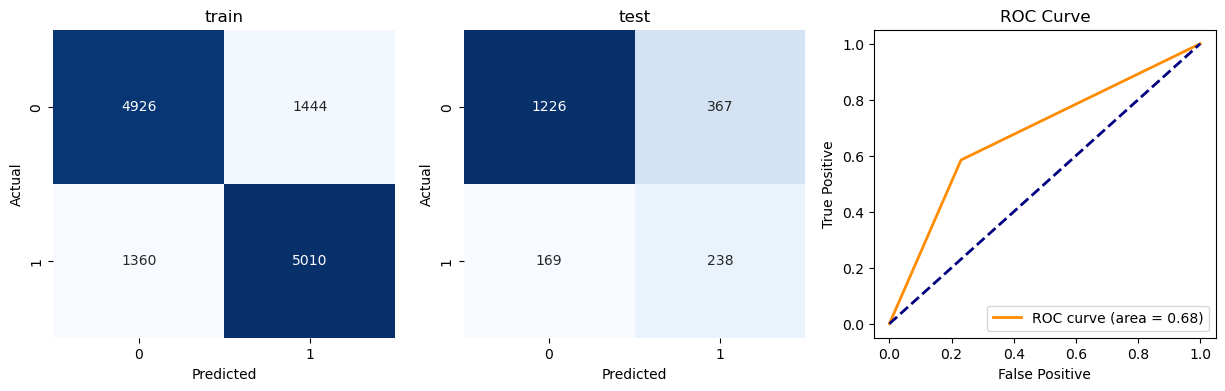

In [69]:
model_evaluation(lrr)                                                                     # calling function for visualizaation

## The first two heatmaps shows us the confusion matrix for Train and Test data repectivly. With this we can see the predicted vs actual data. And the third chart is the ROC curve in which the AUC(Area Under The Curve) indicates how well our model is performing and if the AUC > 0.70 then we can say that it is performing good. But here it is 0.68 so the logistic regression model is performing little less when compared to other models

## DECISION TREE CLASSIFIER

In [71]:
from sklearn.tree import DecisionTreeClassifier,plot_tree                                          # importing decision tree classifier

In [73]:
dt_params = {                                                                            # pram_grid for Decision tree
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None,3,4,5,7, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}
gv_dt = RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=dt_params,cv=5,n_jobs=-1,scoring='f1')                  # performing grid Search cv to find best parameters
gv_dt.fit(X_resampled,y_resampled)
gv_dt.best_params_, gv_dt.best_score_  

({'criterion': 'entropy',
  'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 10,
  'splitter': 'best'},
 0.7999648094050735)

In [74]:
dtt = gv_dt.best_estimator_                                                                # loading the best model with best parameters
dtt.fit(X_resampled,y_resampled)
print(f'train: accuracy_score = {accuracy_score(y_resampled,dtt.predict(X_resampled))}')   # printing training score
print(f'test: accuracy_score = {accuracy_score(y_test,dtt.predict(X_test))}')              # printing test score

train: accuracy_score = 0.87574568288854
test: accuracy_score = 0.789


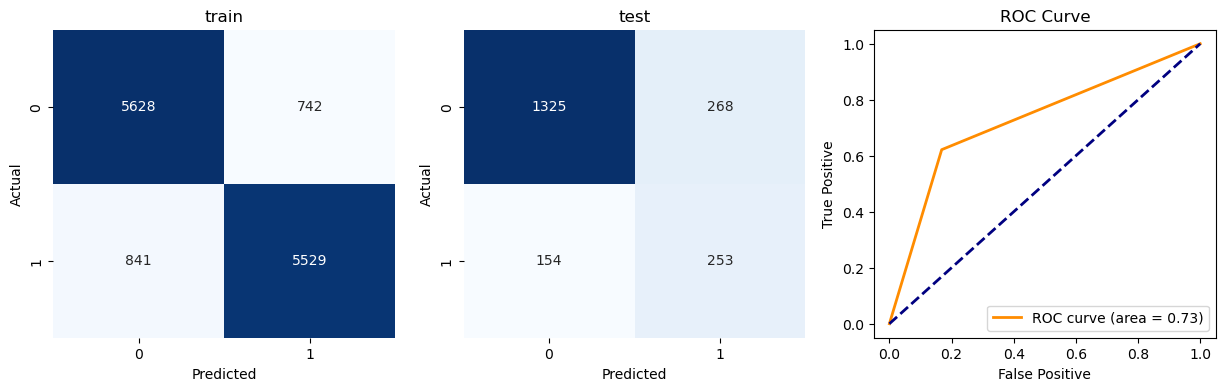

In [75]:
model_evaluation(dtt)

## RANDOM FOREST CLASSIFIER

In [29]:
from sklearn.ensemble import RandomForestClassifier                                                # importing Random forest classifier

In [101]:
rf_params = {                                                                                      # param grid for Random Forest
    'n_estimators': randint(10, 200),
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,4,5,6,7,10],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
    
}
gv_rf = RandomizedSearchCV(RandomForestClassifier(),cv=5,param_distributions =rf_params,n_jobs= -1,scoring='f1')   # performing grid Search cv to find best parameters
gv_rf.fit(X_resampled,y_resampled)
gv_rf.best_params_,gv_rf.best_score_   

({'criterion': 'entropy',
  'max_depth': 10,
  'min_samples_leaf': 2,
  'min_samples_split': 9,
  'n_estimators': 191},
 0.827781816020404)

In [102]:
rff = gv_rf.best_estimator_                                                                         # loading the best model with best parameters
rff.fit(X_resampled,y_resampled)
print(f'train: accuracy_score = {accuracy_score(y_resampled,rff.predict(X_resampled))}')                    # printing training score
print(f'test: accuracy_score = {accuracy_score(y_test,rff.predict(X_test))}')                       # printing test score

train: accuracy_score = 0.8826530612244898
test: accuracy_score = 0.8145


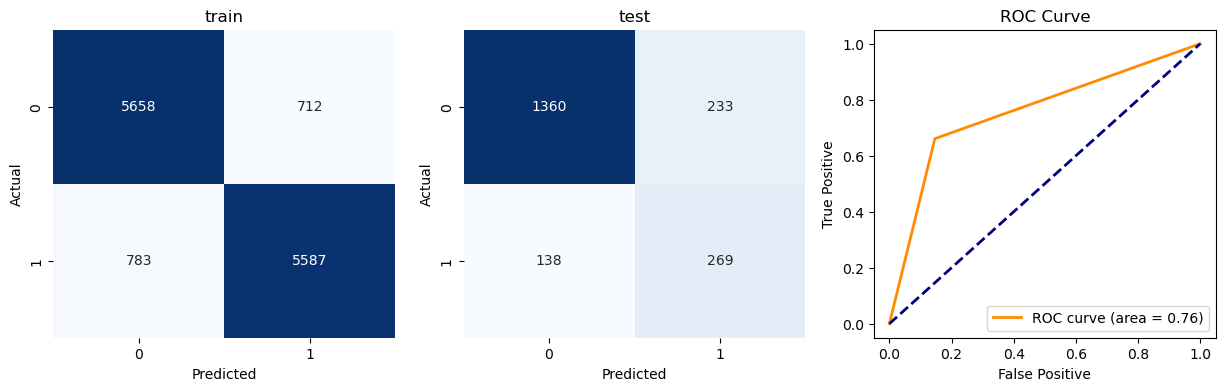

In [103]:
model_evaluation(rff)

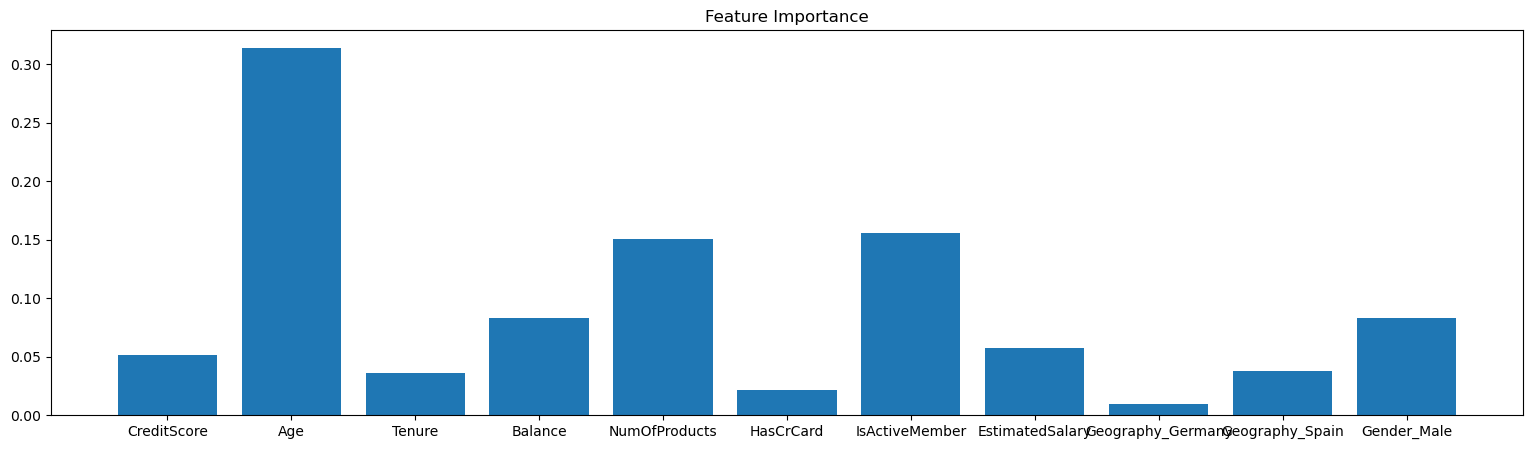

In [104]:
plt.figure(figsize=(19, 5))
feature_importance = rff.feature_importances_
plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns.to_list())   # plotting the bar chart
plt.title("Feature Importance")
plt.show()

## GRADIENT BOOST CLASSIFIER

In [32]:
from sklearn.ensemble import GradientBoostingClassifier                                             # importing gradient boost classifier

In [33]:
gb_params = {                                                                                       # param grid for Gradient boost
    'n_estimators': randint(10, 200),
    'learning_rate': uniform(0.01, 0.15),
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}
gv_gb = RandomizedSearchCV(GradientBoostingClassifier(),cv=5,param_distributions =gb_params,n_jobs= -1,scoring='accuracy')  # performing grid Search cv to find best parameters
gv_gb.fit(X_resampled,y_resampled)
gv_gb.best_params_,gv_gb.best_score_

({'learning_rate': 0.11817320670760852,
  'max_depth': 4,
  'min_samples_leaf': 3,
  'min_samples_split': 4,
  'n_estimators': 187},
 0.8810832025117741)

In [34]:
gb = gv_gb.best_estimator_                                                                             # loading the best model with best parameters
gb.fit(X_resampled,y_resampled)
print(f'train: accuracy_score = {accuracy_score(y_resampled,gb.predict(X_resampled))}')                        # printing training score
print(f'test: accuracy_score = {accuracy_score(y_test,gb.predict(X_test))}')                           # printing test score 

train: accuracy_score = 0.9171899529042387
test: accuracy_score = 0.8385


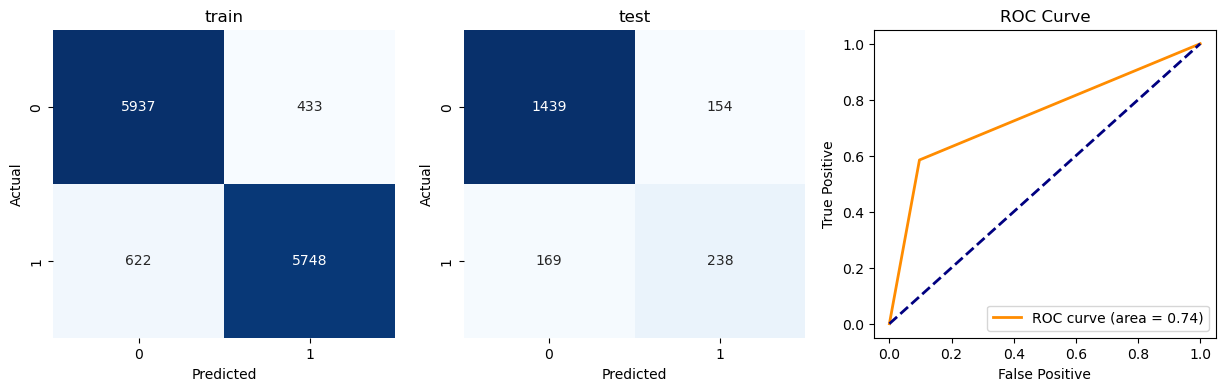

In [52]:
model_evaluation(gb)

## BAGGING CLASSIFIER

In [55]:
from sklearn.ensemble import BaggingClassifier                                                         # importing Bagging classifier

In [105]:
bagging_params = {                                                                                     # param grid for bagging classifier
    'n_estimators': randint(10, 200),
    'max_samples': [0.5, 0.7, 0.9, 1.0], 
    'max_features': [0.5, 0.7, 0.9, 1.0],  
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}
gv_bag = RandomizedSearchCV(BaggingClassifier(DecisionTreeClassifier(max_depth=4)),cv=5,param_distributions =bagging_params,n_jobs= -1,scoring= 'accuracy')  # performing grid Search cv to find best parameters
gv_bag.fit(X_resampled,y_resampled)
gv_bag.best_params_,gv_bag.best_score_  

({'bootstrap': True,
  'bootstrap_features': False,
  'max_features': 0.5,
  'max_samples': 1.0,
  'n_estimators': 160},
 0.8208791208791208)

In [106]:
bag = gv_bag.best_estimator_                                                                      # loading the best model with best parameters
bag.fit(X_resampled,y_resampled)
print(f'train: accuracy_score = {accuracy_score(y_resampled,bag.predict(X_resampled))}')                  # printing training score
print(f'test: accuracy_score = {accuracy_score(y_test,bag.predict(X_test))}')                     # printing test score

train: accuracy_score = 0.8303767660910518
test: accuracy_score = 0.801


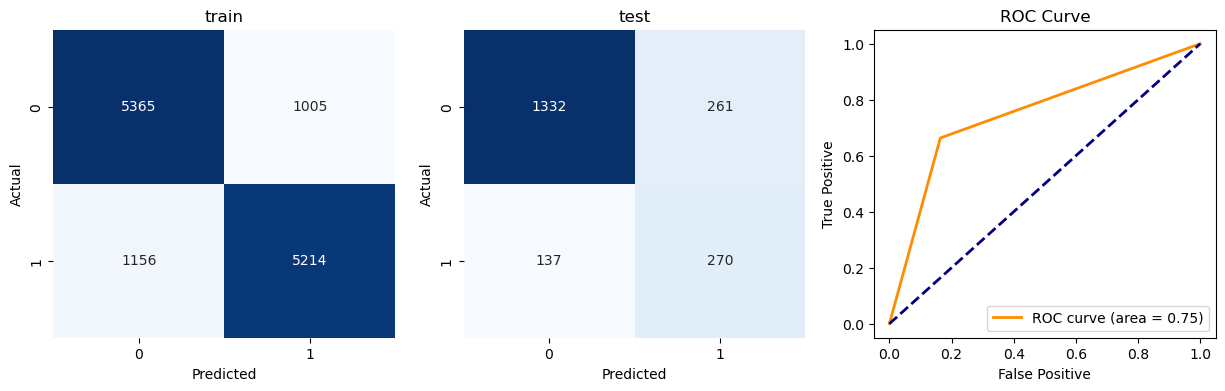

In [107]:
model_evaluation(bag)

## ADA BOOST CLASSIFIER

In [56]:
from sklearn.ensemble import AdaBoostClassifier                                                  # importing Adaboost classifier

In [66]:
adaboost_params = {                                                                              # param grid for ada boost  
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2),
    'algorithm': ['SAMME', 'SAMME.R']
}

gv_ada = RandomizedSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=4)),cv=5,param_distributions =adaboost_params,n_jobs= -1,scoring='accuracy')  # performing grid Search cv to find best parameters
gv_ada.fit(X_resampled,y_resampled)
gv_ada.best_params_,gv_ada.best_score_     

({'algorithm': 'SAMME.R',
  'learning_rate': 0.17354669820430912,
  'n_estimators': 50},
 0.8868131868131869)

In [67]:
ada = gv_ada.best_estimator_                                                                # loading the best model with best parameters
ada.fit(X_resampled,y_resampled)
print(f'train: accuracy_score = {accuracy_score(y_resampled,ada.predict(X_resampled))}')            # printing training score
print(f'test: accuracy_score = {accuracy_score(y_test,ada.predict(X_test))}')               # printing test score

train: accuracy_score = 0.9138147566718995
test: accuracy_score = 0.86


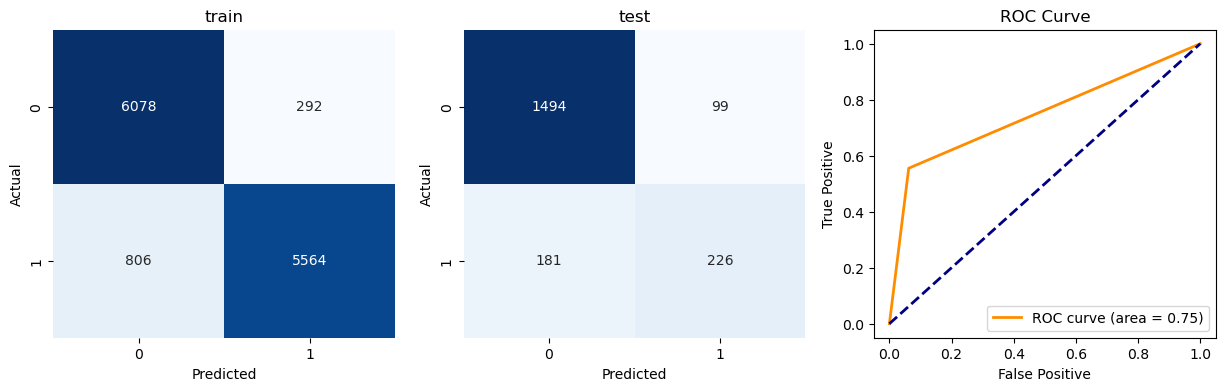

In [68]:
model_evaluation(ada)

## XGBOOST CLASSIFIER

In [57]:
from xgboost import XGBClassifier                                                                 # importing Xgboost classifier
import xgboost

In [42]:
xgb_params = {                                                                                    # pram grid for Xgboost
    'n_estimators': randint(10, 200),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3, 4],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}
gv_xgb = RandomizedSearchCV(XGBClassifier(),cv=5,param_distributions =xgb_params,n_jobs= -1,scoring='accuracy')   # performing grid Search cv to find best parameters
gv_xgb.fit(X_resampled,y_resampled)
gv_xgb.best_params_,gv_xgb.best_score_  

({'colsample_bytree': 0.8,
  'gamma': 0.2,
  'learning_rate': 0.17086489836675023,
  'max_depth': 5,
  'min_child_weight': 2,
  'n_estimators': 74,
  'reg_alpha': 0.5,
  'reg_lambda': 0.5,
  'subsample': 0.8},
 0.8704081632653061)

In [43]:
xgb = gv_xgb.best_estimator_                                                                       # loading the best model with best parameters
xgb.fit(X_resampled,y_resampled)
print(f'train: accuracy_score = {accuracy_score(y_resampled,xgb.predict(X_resampled))}')                   # printing training score
print(f'test: accuracy_score = {accuracy_score(y_test,xgb.predict(X_test))}')                      # printing test score

train: accuracy_score = 0.9078492935635792
test: accuracy_score = 0.838


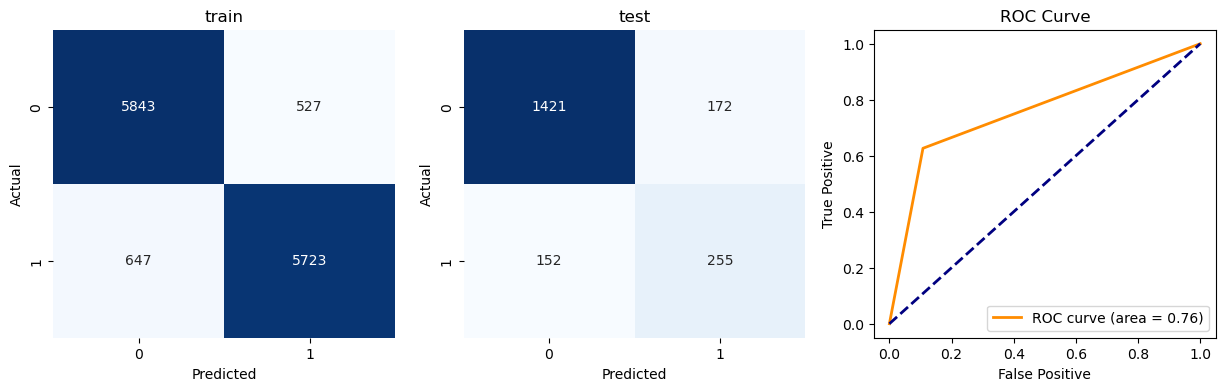

In [58]:
model_evaluation(xgb)

### In all these models, if we only consider roc_curve then we can say Xgboost and Random forest performed well and if we consider the acuuracy with less overfitting then we can say Ada boost performed well.